In [2]:
!pip install pandas
!python -m pip install pandas-datareader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
! pip install yfinance --upgrade --no-cache-dir

In [4]:
import yfinance as yf

start = '2010-01-01'
end = '2024-03-31'

df = yf.download('RELIANCE.NS', start=start, end=end)
df.head()






#start = '2010-01-01'
#end = '2019-12-31'
#df = data.DataReader('TSLA', 'yahoo', start, end)
#df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,498.814209,498.814209,467.155457,491.682404,440.421936,38323043
2010-01-05,525.695618,525.695618,487.065033,489.488007,438.456329,10696412
2010-01-06,493.693939,500.368591,489.465149,497.397003,445.540833,11845880
2010-01-07,497.397003,509.740479,492.825348,505.648834,452.932404,13098960
2010-01-08,506.540314,509.191895,501.054321,504.323059,451.744781,7555074


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468
2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804
2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953
2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322
2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951,2971.699951,10927182


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,498.814209,498.814209,467.155457,491.682404,440.421936,38323043
1,2010-01-05,525.695618,525.695618,487.065033,489.488007,438.456329,10696412
2,2010-01-06,493.693939,500.368591,489.465149,497.397003,445.540833,11845880
3,2010-01-07,497.397003,509.740479,492.825348,505.648834,452.932404,13098960
4,2010-01-08,506.540314,509.191895,501.054321,504.323059,451.744781,7555074


In [7]:
df = df.drop(['Date' , 'Adj Close'],  axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,498.814209,498.814209,467.155457,491.682404,38323043
1,525.695618,525.695618,487.065033,489.488007,10696412
2,493.693939,500.368591,489.465149,497.397003,11845880
3,497.397003,509.740479,492.825348,505.648834,13098960
4,506.540314,509.191895,501.054321,504.323059,7555074


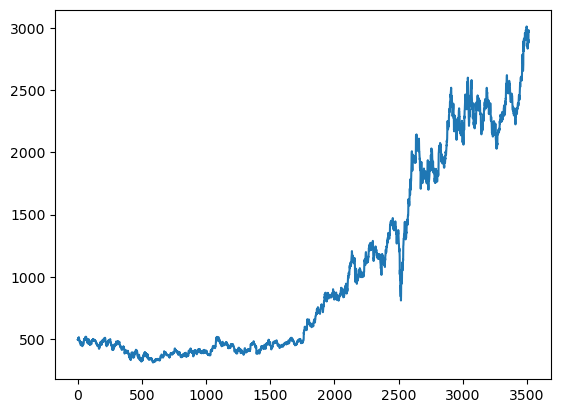

In [8]:
plt.plot(df.Close)

In [9]:
df


,Open,High,Low,Close,Volume
0,498.814209,498.814209,467.155457,491.682404,38323043
1,525.695618,525.695618,487.065033,489.488007,10696412
2,493.693939,500.368591,489.465149,497.397003,11845880
3,497.397003,509.740479,492.825348,505.648834,13098960
4,506.540314,509.191895,501.054321,504.323059,7555074
...,...,...,...,...,...
3509,2905.050049,2915.800049,2889.350098,2901.949951,6503468
3510,2899.949951,2920.000000,2894.699951,2910.050049,9763804
3511,2890.000000,2904.800049,2878.000000,2883.149902,5707953
3512,2896.000000,3000.000000,2894.000000,2985.699951,8163322


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3509    2650.816494
3510    2657.651995
3511    2663.825493
3512    2670.557493
3513    2677.395493
Name: Close, Length: 3514, dtype: float64

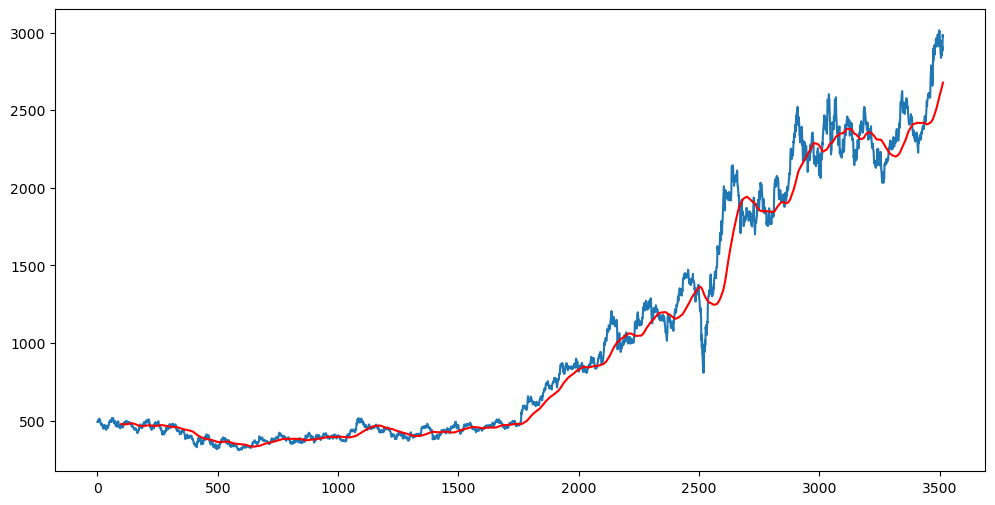

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3509    2534.405409
3510    2537.587765
3511    2540.672771
3512    2544.168766
3513    2547.585070
Name: Close, Length: 3514, dtype: float64

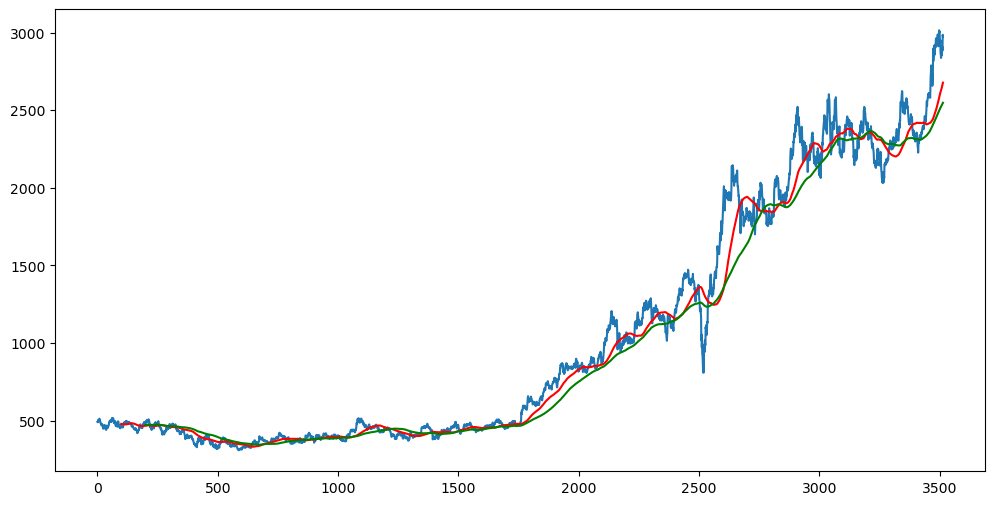

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [14]:
df.shape

(3514, 5)

In [15]:
# Splitting data into traning and testing

data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_traning.shape)
print(data_testing.shape)


(2459, 1)
(1055, 1)


In [16]:
data_traning.head()

,Close
0,491.682404
1,489.488007
2,497.397003
3,505.648834
4,504.323059


In [17]:
data_testing.head()

,Close
2459,1410.221069
2460,1411.912598
2461,1384.345459
2462,1380.276611
2463,1403.775024


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.15700919],
       [0.15512225],
       [0.16192312],
       ...,
       [0.96969109],
       [0.95007475],
       [0.92566246]])

In [20]:
data_traning_array.shape

(2459, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100: i])
    y_train.append(data_traning_array[i, 0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2359, 100, 1)

In [23]:
# ML Model


from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True , input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 224ms/step - loss: 0.0460
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - loss: 0.0046
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - loss: 0.0060
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - loss: 0.0036
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - loss: 0.0037
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - loss: 0.0038
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - loss: 0.0034
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0032
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - loss: 0.0031
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - loss: 0.0032
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - loss: 0.0030
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 0.0033
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - loss: 0.0027
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - loss: 0.0030
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [27]:
model.save('keras_model2.h5')

In [28]:
#model.save('my_model1.keras')

In [29]:
data_testing.head()

,Close
2459,1410.221069
2460,1411.912598
2461,1384.345459
2462,1380.276611
2463,1403.775024


In [30]:
data_traning.tail(100)

,Close
2359,1107.211182
2360,1079.735474
2361,1066.340576
2362,1079.141235
2363,1082.889893
...,...
2454,1472.029907
2455,1462.109497
2456,1436.782471
2457,1413.969849


In [31]:
past_100_days = data_traning.tail(100)

In [32]:
#final_df = past_100_days.append(data_testing, ignore_index = True)
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [33]:
final_df.head()

,Close
0,1107.211182
1,1079.735474
2,1066.340576
3,1079.141235
4,1082.889893


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13546226],
       [0.12301   ],
       [0.1169393 ],
       ...,
       [0.94033488],
       [0.98681155],
       [0.98046662]])

In [35]:
input_data.shape

(1155, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
#x_train , y_train = np.array(x_train), np.array(y_train)

In [37]:
x_test , y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1055, 100, 1)
(1055,)


In [38]:
# Making Prediction

y_predicted = model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step


In [39]:
y_predicted.shape

(1055, 1)

In [40]:
y_test

array([0.27278927, 0.27355589, 0.26106219, ..., 0.94033488, 0.98681155,
       0.98046662])

In [41]:
y_predicted

array([[0.29575855],
       [0.2959586 ],
       [0.2959403 ],
       ...,
       [0.8989029 ],
       [0.8985535 ],
       [0.90020525]], dtype=float32)

In [42]:
scaler.scale_

array([0.00045321])

In [46]:
scale_factor = 1/0.00045321

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

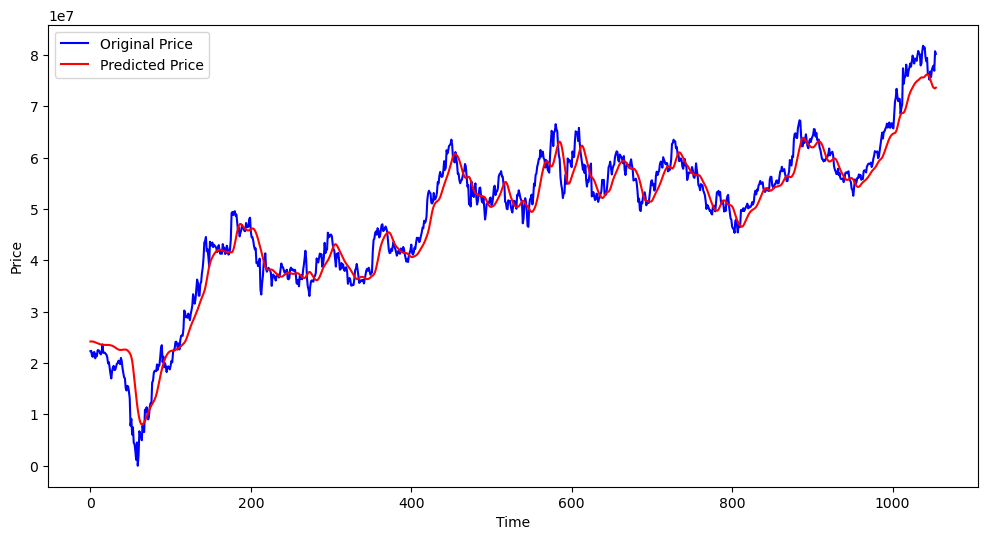

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
